In [10]:
import matplotlib.pyplot as plt
from skimage.io import imread
from glob import glob
import numpy as np
import os
from random import randint

In [11]:
img_glob = glob('/lfs/jonas/unetplus/0/' + '*.jpg')
#img_glob

In [12]:
mask_path_list = []
GT_path = '/data/spacenet/bldg/data/pytorch-PAN/masks/0/'
for idx, path in enumerate(img_glob):
    img_name = os.path.splitext(os.path.split(path)[-1])[0] + '.tif'
    mask_path_list += [os.path.join(GT_path, img_name)]
#mask_path_list

In [13]:
maskList = []
for idx, img in enumerate(mask_path_list):
    image = np.array(imread(img)[:,:])
    maskList += [image]
    
maskArr = np.array(maskList)

In [14]:
imgList = []
for idx, img in enumerate(img_glob):
    image = np.array(imread(img))
    imgList += [image]
    
imgArr = np.array(imgList)

In [15]:
imgArr.shape

(1695, 256, 256)

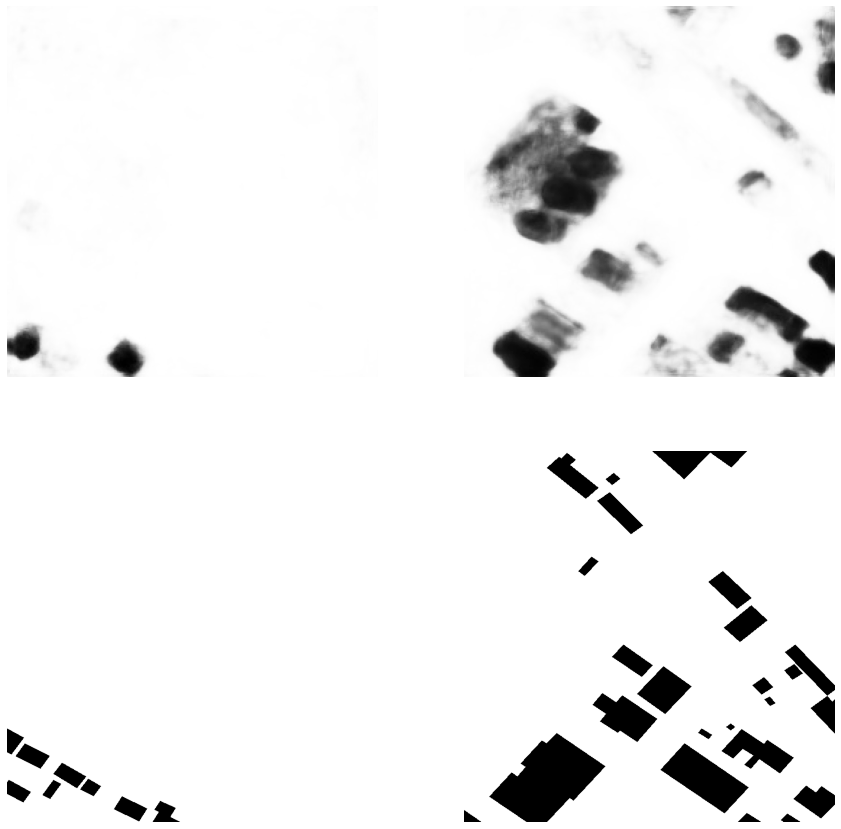

In [22]:
count = 2
randNum = randint(0, imgArr.shape[0]-count)
fig, axs = plt.subplots(2, count, figsize=(15, 15))
for idx, ax in enumerate(axs[0]):
    idx += randNum
    ax.imshow(imgArr[idx, :, :], cmap = 'Greys')
    ax.axis('off')
for idx, ax in enumerate(axs[1]):
    idx += randNum
    ax.imshow(maskArr[idx, :, :], cmap = 'Greys')
    ax.axis('off')        

In [17]:
from skimage.io import imread
from albumentations.augmentations import transforms
import matplotlib.pyplot as plt

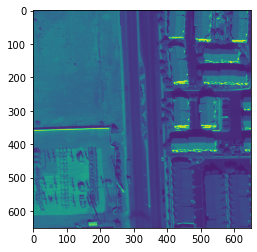

In [18]:
img = imread('/data/spacenet/bldg/data/pytorch-PAN-valid/images/PAN_AOI_2_Vegas_img1006.tif')
mask = imread('/data/spacenet/bldg/data/pytorch-PAN-valid/masks/0/PAN_AOI_2_Vegas_img1006.tif')
plt.imshow(img)

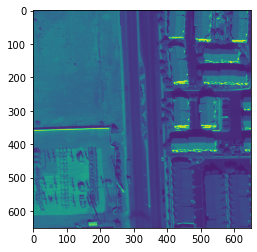

In [19]:
trans = transforms.ShiftScaleRotate(shift_limit=0.10, scale_limit=0.5, rotate_limit=360, p=0.5)
aug = trans(image=img, mask=mask)
plt.imshow(aug['image'])

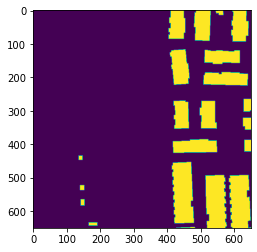

In [20]:
plt.imshow(aug['mask'])